# Pymaceuticals Inc.
---

### Analysis

- Mouse L509 started taking Capomulin as a drug regimen, the tumor size of mouse L509 continued to increase in size over the first 20 days of treatment but began to see a dramatic drop in tumor size after day 20 and a peak minimun size of tumor on day 35 while on Capomulin drug regimen. The tumor size of mouse L509 had a drop of 8mm in volume from the peak of the tumor to the end of the observed period time of mouse L509 which was a total of a little over 40 days on the drug regimen.

- The data also teaches us that Ramicane drug regimen had the lowest average of tumor size of all the treatments being observed, while Infubinol had the highest average tumor size of the drug regimens. The study size of all the drug regimens was over 150 mice per drug regimen so the outcomes are similar in size. 

- The data set also suggests that the bigger the mouse in weight, the bigger size in volume of the tumor size. 
 

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data= pd.merge(mouse_metadata, study_results, how= 'outer', on= "Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [59]:
# Checking the number of mice.
mice_count = combined_data["Mouse ID"].value_counts()
number_of_mice = len(mice_count)
number_of_mice

249

In [60]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint",]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [61]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_ID = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
all_duplicate_mouse_ID


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data["Mouse ID"].isin(duplicate_mice)== False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [63]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_count = clean_df["Mouse ID"].nunique()
cleaned_mice_count

248

## Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df['Drug Regimen']).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df['Drug Regimen']).median()
var = clean_df["Tumor Volume (mm3)"].groupby(clean_df['Drug Regimen']).var()
std = clean_df["Tumor Volume (mm3)"].groupby(clean_df['Drug Regimen']).std()
sem = clean_df["Tumor Volume (mm3)"].groupby(clean_df['Drug Regimen']).sem()

Summary_Stats = pd.DataFrame({"Mean Tumor Volume": mean,
                              "Median Tumor Volume": median,
                              "Tumor Volume Variance": var,
                              "Tumor Volume Std. Dev.": std,
                              "Tumor Volume Std. Err.": sem})
Summary_Stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [65]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Summary_Agg = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
Summary_Agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

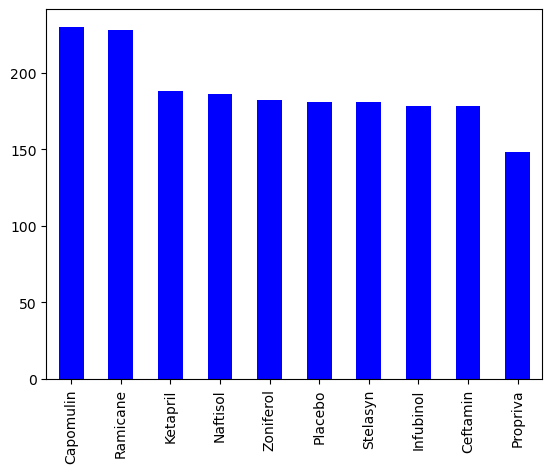

In [66]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_regimen = clean_df["Drug Regimen"].value_counts()
Mice_plot = mice_regimen.plot.bar(color= "blue")
plt.xlabel=("Drug Regimen")
plt.ylabel=("Number of Mice")

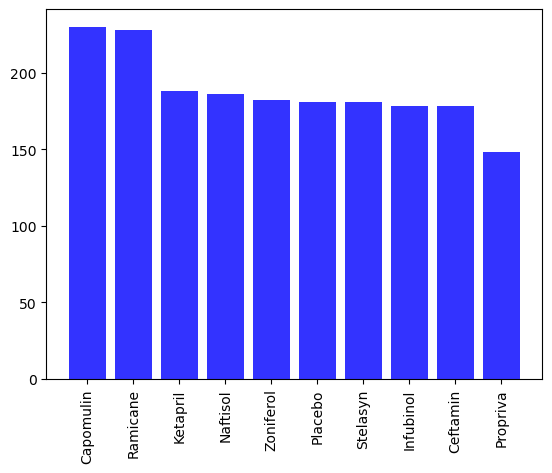

In [67]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_regimen.index.values
y_axis = mice_regimen.values

plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')


plt.set_xlabel= ('Drug Regimen')
plt.set_ylabel= ("# of Observed Mouse Timepoints")
plt.xticks(rotation= "vertical")

plt.show()

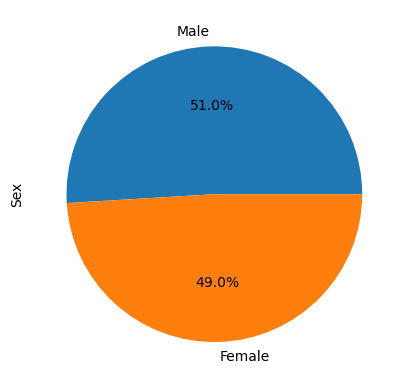

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data= clean_df["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

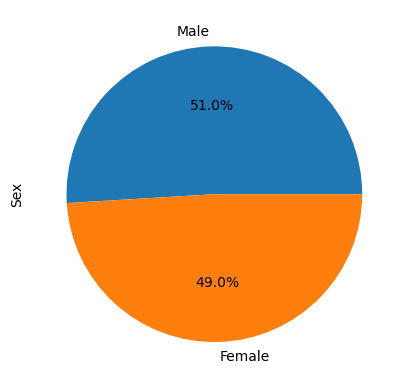

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [49, 51]
plot = gender_data.plot.pie(y= 'Total Count', autopct = "%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [70]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_data.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_timepoint = last_timepoint.merge(combined_data, on=["Mouse ID", "Timepoint"], how="left")
merged_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [71]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_timepoint.loc[merged_timepoint["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"For {drug}, the outliers are: {outliers}")

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


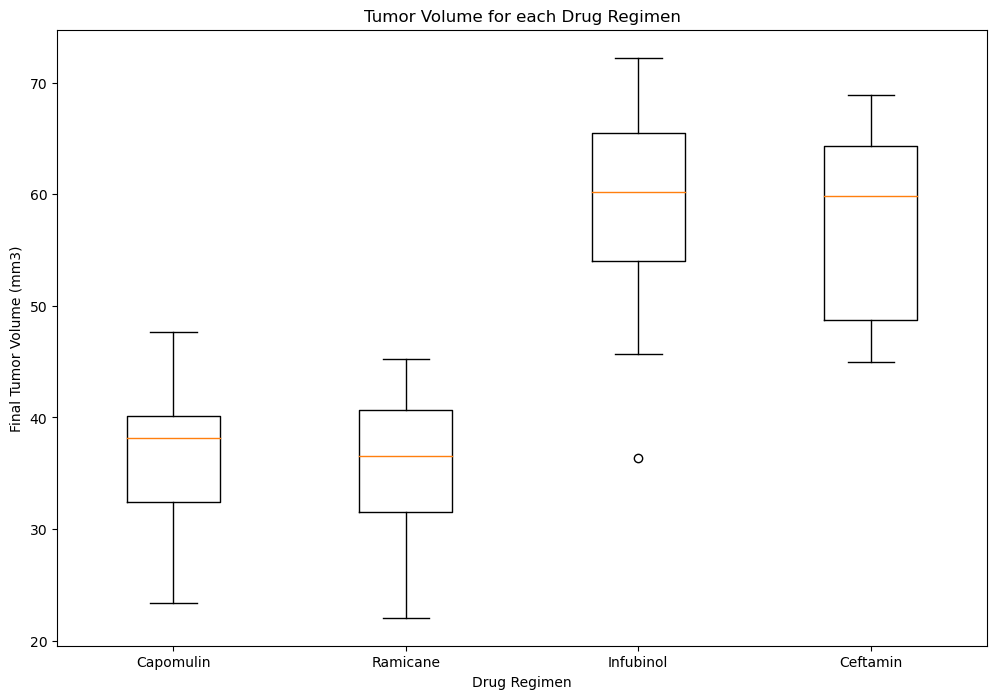

In [72]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title('Tumor Volume for each Drug Regimen',fontsize =12)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 10)
ax1.set_xlabel('Drug Regimen',fontsize = 10)
ax1.boxplot(tumor_volume_data, labels=treatments, widths = 0.4, vert=True)

plt.show()

## Line and Scatter Plots

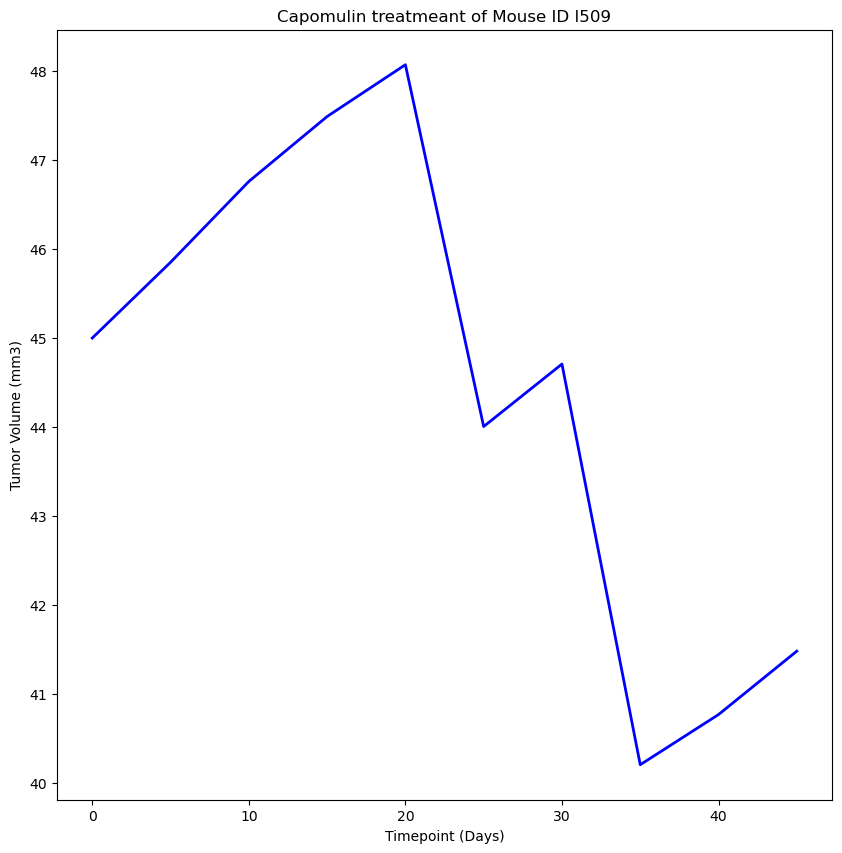

In [73]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
capomulin_df

specific_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
specific_mouse

x_axis = specific_mouse["Timepoint"]
tumor_volume = specific_mouse["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(10, 10))
plt.title("Capomulin treatmeant of Mouse ID l509",fontsize= 12)
plt.plot(x_axis, tumor_volume,linewidth=2, markersize=12, color="blue", label="mm3")
ax1.set_xlabel("Timepoint (Days)")
ax1.set_ylabel("Tumor Volume (mm3)")
plt.show()

/var/folders/9k/96ysyqg55y100wnfwjjjwgvc0000gn/T/ipykernel_3615/3196545651.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Capo_Avg_Tumor_df = capomulin_df.groupby(['Mouse ID']).mean()


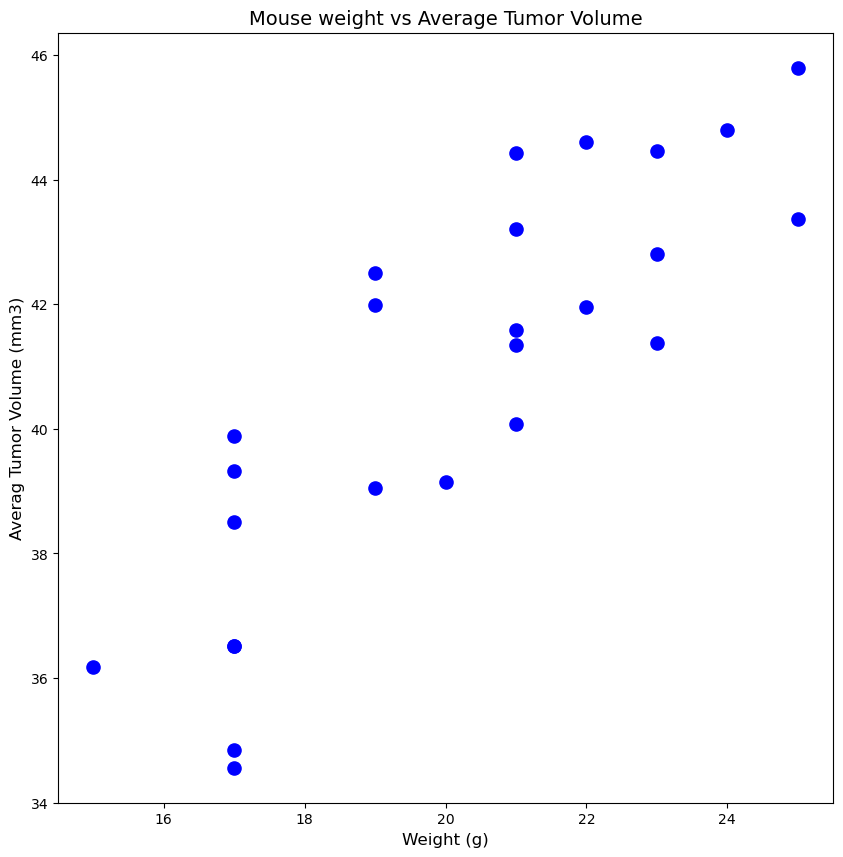

In [74]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capo_Avg_Tumor_df = capomulin_df.groupby(['Mouse ID']).mean()
fig1, ax1 = plt.subplots(figsize=(10, 10))
marker_size=14
plt.scatter(Capo_Avg_Tumor_df['Weight (g)'],Capo_Avg_Tumor_df['Tumor Volume (mm3)'],s=90, color="blue")
plt.title("Mouse weight vs Average Tumor Volume",fontsize =14)
ax1.set_xlabel("Weight (g)", fontsize= 12)
ax1.set_ylabel("Averag Tumor Volume (mm3)",fontsize =12)

plt.show()

## Correlation and Regression

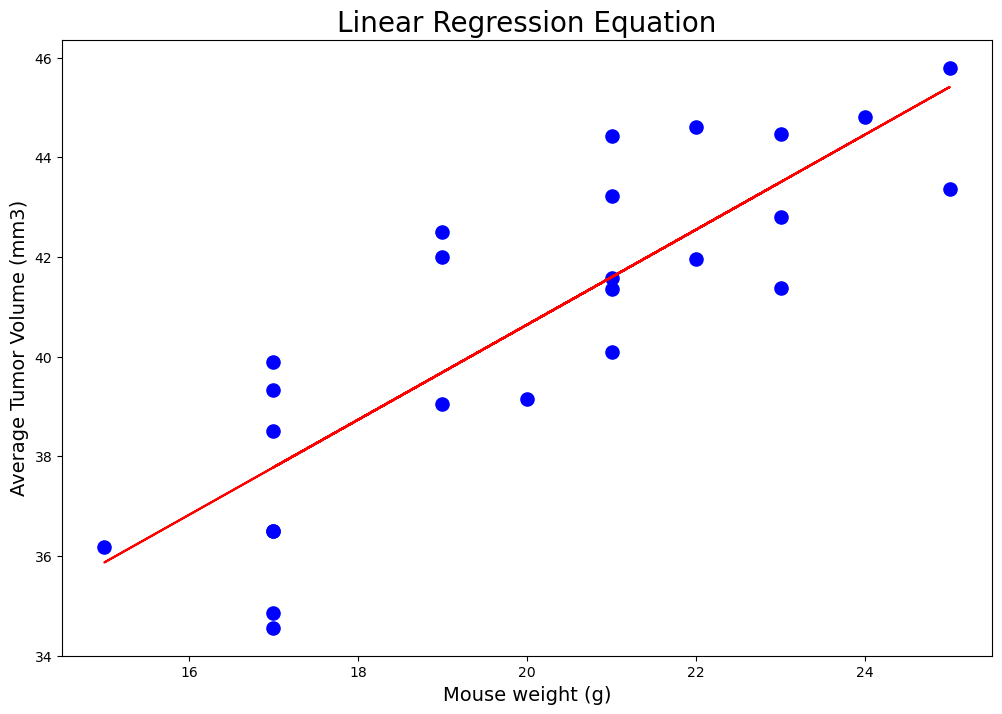

In [82]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = Capo_Avg_Tumor_df['Weight (g)']
y_values = Capo_Avg_Tumor_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(x_values,y_values, s=90, color="blue")
plt.plot(x_values,regress_values,"r-")
ax1.set_title("Linear Regression Equation", fontsize=20)
ax1.set_xlabel("Mouse weight (g)", fontsize =14)
ax1.set_ylabel("Average Tumor Volume (mm3)", fontsize=14)
plt.show()

